In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf

from scipy import stats
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

### ***I. Import Data***

In [2]:
def importData(filename):
    """
    Fungsi untuk import data & hapus duplikat
    :param filename: <string> nama file input (format .csv)
    :return df: <pandas dataframe> sampel data
    """

    # read data
    df = pd.read_csv(filename, encoding='utf-8')
    print("Data asli            : ", df.shape, "- (#observasi, #kolom)")

    # drop duplicates
    df = df.drop_duplicates()
    print("Data setelah di-drop : ", df.shape, "- (#observasi, #kolom)")

    return df

# (filename) adalah argumen
# Argumen adalah sebuah variable. 
# Jika fungsi tsb. diberi argumen filename = "bank_data.csv", 
# maka semua variabel 'filename' di dalam fungsi 
# akan berubah menjadi "bank_data.csv"

In [6]:
data = 'stat_test.csv'

In [9]:
df = importData(filename = data)

Data asli            :  (6281, 8) - (#observasi, #kolom)
Data setelah di-drop :  (6281, 8) - (#observasi, #kolom)


In [8]:
df.head()

,Unnamed: 0,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,8.5,196
1,1,COMPACT,2.4,4,Manual,Premium Gasoline,9.6,221
2,2,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,5.9,136
3,3,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,11.1,255
4,4,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,10.6,244


### ***II. Uji Statistik***

Jumlah sampel pada dataset jika dikelompokkan berdasarkan kategori dalam fitur, sebagian besar melebihi 30 sampel. Akan tetapi, karena nilai variance pada populasi tidak diketahui, maka uji statistik yang digunakan adalah t-test. Uji ini digunakan untuk menguji perbedaan nilai mean emisi karbon pada fitur kategorikal, yaitu "Vehicle Class".

In [10]:
#cek unique name pada vehicle class
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

Uji t-test untuk melihat perbandingan antara tipe compact dan SUV ukuran kecil.

**H0 : compact >= SUV small**

**H1 : compact < SUV small**

In [11]:
df['Fuel Type'].unique()

array(['Premium Gasoline', 'Diesel', 'Regular Gasoline', 'Ethanol(E85)'],
      dtype=object)

In [12]:
# vehicle class: compact
data_group1 = df[(df['Vehicle Class'] == 'COMPACT') 
                 & (df['Fuel Type']== 'Regular Gasoline') & (df['Transmission']== 'Automatic')]['CO2 Emissions(g/km)'].values

# vehicle class: SUV - small
data_group2 = df[(df['Vehicle Class'] == 'SUV - SMALL') 
                 & (df['Fuel Type']== 'Regular Gasoline') & (df['Transmission']== 'Automatic')]['CO2 Emissions(g/km)'].values

# variance 
np.var(data_group1), np.var(data_group2)

(537.1671597633137, 834.3028575035771)

In [13]:
# hasil t-test
result = stats.ttest_ind(a = data_group1, 
                         b = data_group2, 
                         equal_var=False, 
                         alternative = "less")


In [14]:
result.statistic

-10.650039130024899

In [15]:
result.pvalue

9.095017704628163e-13

In [16]:
# Menentukan aturan keputusan
if result.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [17]:
df_data = len(data_group1)+len(data_group2)-2
df_data

242

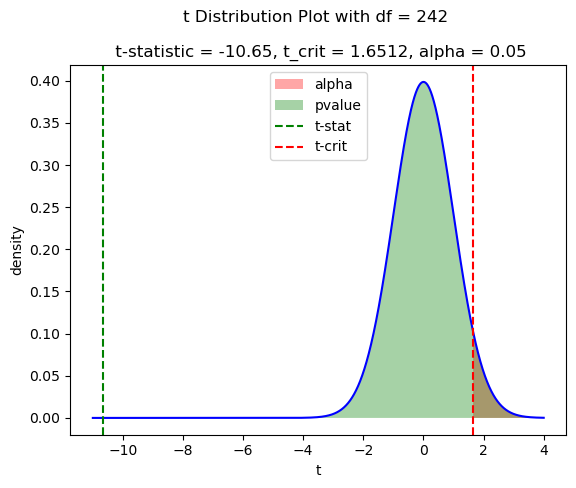

In [18]:
# plot sample distribution 
x = np.arange(-11, 4, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [19]:
# confidence interval

cm = CompareMeans(d1 = DescrStatsW(data=data_group1), 
                  d2 = DescrStatsW(data=data_group2))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='smaller', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -inf -45.09576427157478 ]


In [20]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

Uji t-test untuk melihat perbandingan antara nilai mean sample tipe SUV ukuran kecil dan SUV ukuran standar.

**H0 : SUV small >= SUV standard**

**H1 : SUV small < SUV standard**

In [21]:
# vehicle class: SUV small
data_group3 = df[(df['Vehicle Class']== 'SUV - SMALL')
                 & (df['Fuel Type']== 'Regular Gasoline') & (df['Transmission']== 'Automatic')]['CO2 Emissions(g/km)'].values

# vehicle class: SUV standard
data_group4 = df[(df['Vehicle Class']== 'SUV - STANDARD')
                 & (df['Fuel Type']== 'Regular Gasoline') & (df['Transmission']== 'Automatic')]['CO2 Emissions(g/km)'].values

# variance 
np.var(data_group3), np.var(data_group4)

(834.3028575035771, 871.3986282578876)

In [22]:
# hasil uji t-test
result2 = stats.ttest_ind(a = data_group3, 
                         b = data_group4, 
                         equal_var=False, 
                         alternative = "less")


In [23]:
result2.statistic

-17.986339228346456

In [24]:
#P-Value
result2.pvalue

7.338809601337889e-49

In [25]:
# Menentukan aturan keputusan
if result2.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [26]:
df_data2 = len(data_group3)+len(data_group4)-2
df_data2

351

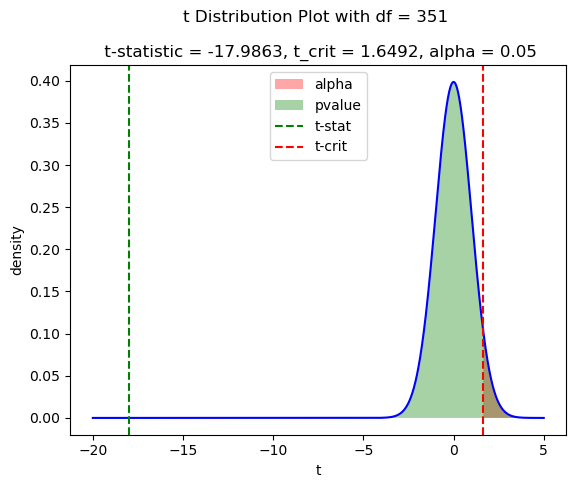

In [27]:

# plot sample distribution 
x = np.arange(-20, 5, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data2), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data2), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data2)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result2.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data2)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result2.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data2), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data2} \n\n t-statistic = {np.round(result2.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [31]:
# confidence interval

cm = CompareMeans(d1 = DescrStatsW(data=data_group3), 
                  d2 = DescrStatsW(data=data_group4))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='smaller', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -inf -52.5493778883436 ]


Uji t-test untuk melihat perbandingan antara nilai mean sample tipe SUV ukuran kecil dan SUV ukuran standar.

**H0 : Cargo Van >= Passenger Van**

**H1 : Cargo Van < Passenger Van**


In [32]:
# vehicle class: van - cargo
data_group5 = df[(df['Vehicle Class']== 'VAN - CARGO' )
                & (df['Fuel Type']== 'Regular Gasoline') & (df['Transmission']== 'Automatic')]['CO2 Emissions(g/km)'].values

# vehicle class: van - passenger
data_group6 = df[(df['Vehicle Class']== 'VAN - PASSENGER')
                & (df['Fuel Type']== 'Regular Gasoline') & (df['Transmission']== 'Automatic')]['CO2 Emissions(g/km)'].values

# variance 
np.var(data_group5), np.var(data_group6)

(189.4097222222222, 576.0195918367347)

In [33]:
result3 = stats.ttest_ind(a = data_group5, 
                         b = data_group6, 
                         equal_var=False, 
                         alternative = "less")


In [34]:
result3.statistic

-9.175142401360802

In [35]:
result3.pvalue

6.737808760089936e-11

In [37]:
# Menentukan aturan keputusan
if result3.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


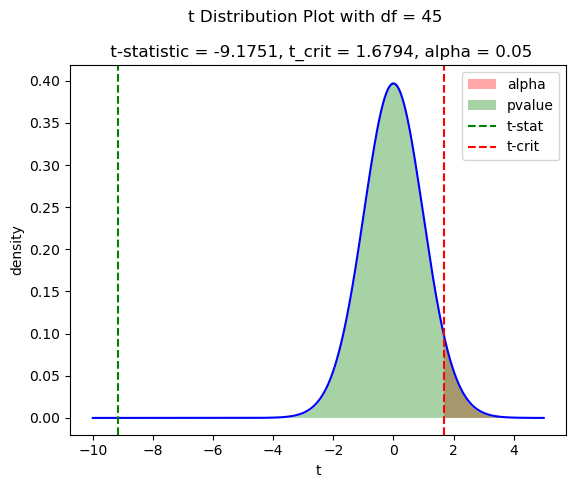

In [39]:
# plot sample distribution 
x = np.arange(-10, 5, 0.001)
plt.plot(x, stats.t.pdf(x, df = df_data3), 
         color='blue')

# plot alpha region
x_alpha = np.arange(stats.t.ppf(1-0.05, df = df_data3), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = df_data2)
plt.fill_between(x = x_alpha, 
                 y1 = y_alpha,
                 facecolor = 'red',
                 alpha = 0.35, 
                 label = 'alpha')

# plot pvalue
x_pvalue = np.arange(result3.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = df_data2)

plt.fill_between(x = x_pvalue, 
                 y1 = y_pvalue,
                 facecolor = 'green',
                 alpha = 0.35, 
                 label = 'pvalue')

# plot t-crit and t-stats
plt.axvline(np.round(result3.statistic, 4), 
            color ="green", 
            linestyle = "--", 
            label ="t-stat")

t_crit = np.round(stats.t.ppf(1-0.05, df = df_data3), 4)
plt.axvline(t_crit, 
            color ="red", 
            linestyle = "--", 
            label ="t-crit")

plt.legend()
plt.xlabel("t")
plt.ylabel("density")


plt.title(f't Distribution Plot with df = {df_data3} \n\n t-statistic = {np.round(result3.statistic, 4)}, t_crit = {np.round(t_crit,4)}, alpha = 0.05');

In [40]:
# confidence interval

cm = CompareMeans(d1 = DescrStatsW(data=data_group5), 
                  d2 = DescrStatsW(data=data_group6))

lower, upper = cm.tconfint_diff(alpha=0.05, 
                                alternative='smaller', 
                                usevar='unequal')

print("Confidence Interval", ":", "[", lower, upper, "]")

Confidence Interval : [ -inf -43.73453747722792 ]
